In [4]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [5]:
torch.cuda.is_available()


True

In [6]:
pic_ = Image.open("pic1.jpg")


In [7]:
pic_array = np.asarray(pic_)
pic_array.shape


(456, 624, 3)

In [8]:
img_ten = torch.from_numpy(pic_array)
img_ten = img_ten.permute(2,0,1)
img_ten.shape


torch.Size([3, 456, 624])

In [9]:
img_ten = img_ten.unsqueeze(0)
img_ten.shape


torch.Size([1, 3, 456, 624])

In [10]:
import torch.nn.functional as F



In [54]:
I = torch.eye(3)
I[:2] *= -1

affine = F.affine_grid(I[:2].unsqueeze(0).to(torch.float32), img_ten.size())



In [55]:
I[:2]

tensor([[-1., -0., -0.],
        [-0., -1., -0.]])

In [56]:
affine = affine.to(torch.float32)
img_ten = img_ten.to(torch.float32)


In [57]:
cheeck = F.grid_sample(img_ten, affine, padding_mode="border").to("cpu")


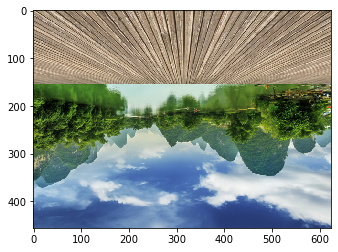

In [58]:
plt.imshow(cheeck.squeeze(0).permute(1,2,0).to(torch.long))


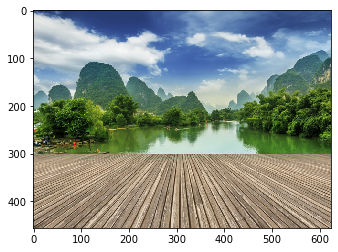

In [47]:
plt.imshow(pic_array)
